# 6.2 Preprocess department 23-00089 (Lawrence, IN) UOF

Woah! This is the first UOF file to be prepared.

First, we will be preoccupied with standardizing:

- Date
- Location

Later on (after more UOF files have been reviewed), we can occupy ourself with more specific stuff, like... Column naming, categories inside columns, standard of formats...

In [3]:
import pandas

from cpe_help import Department

In [8]:
dept = Department('23-00089')
path = dept.tabular_input_dir / '23-00089_UOF-P.csv'
df = pandas.read_csv(path, low_memory=False, skiprows=[1])

In [9]:
df.shape

(10274, 26)

In [10]:
df.head().T

,0,1,2,3,4
INCIDENT_UNIQUE_IDENTIFIER,9c7c088255e6080dceebafbae22df7eb,670a17d1bc2593b64664b361760d73c5,0dbfcea33161568591ee1bce0498b590,2c556058ed11488c1badb2282f6e453c,f636c99ea09082c1275875903d027ad9
INCIDENT_DATE,8/23/14 0:00,8/28/14 0:00,8/23/14 0:00,8/28/14 0:00,8/24/14 0:00
OFFICER_ASSIGNMENT,Operations Division,Operations Division,Operations Division,Homeland Security Division,Operations Division
LOCATION_DISTRICT,Northwest District,Southeast District,North District,Homeland Security Bureau/Tactical,Southwest District
SHIFT,NW Day Shift,SE Middle Shift,ND Late Tactical Shift,Canine Section,SW Middle Shift
LOCATION_DISTRICT.1,NW Day Shift,NaN,NaN,Canine Unit - Late,NaN
REASON_FOR_FORCE,Fleeing,Combative Suspect,Resisting Arrest,Non-Compliant,Combative Suspect
TYPE_OF_FORCE_USED,Less Lethal-Taser,"Physical-Hands, Fist, Feet",Physical-Handcuffing,Canine Bite,Physical-Handcuffing
SUBJECT_DETAILS,In compliance,In compliance,In compliance,In compliance,In compliance
INCIDENT_REASON,Self-Initiated Activity,Arrest,Call For Service,Request For PSD,Arrest


# Date

First, let's focus on date. It seems like this dataframe has no separate time column, and only an INCIDENT_DATE with a format that is close to the format used in the Boston field interviews data.

Let's try processing:

In [11]:
[c for c in df if c.startswith('INCIDENT')]

['INCIDENT_UNIQUE_IDENTIFIER', 'INCIDENT_DATE', 'INCIDENT_REASON']

In [13]:
date = df['INCIDENT_DATE']
datef = pandas.to_datetime(date, format='%m/%d/%y %H:%M')

In [14]:
datef.describe()

count                   10021
unique                   1287
top       2017-03-04 00:00:00
freq                       41
first     2014-01-01 00:00:00
last      2018-05-21 00:00:00
Name: INCIDENT_DATE, dtype: object

Dates from January 2014 to May 2018... That's reasonable.

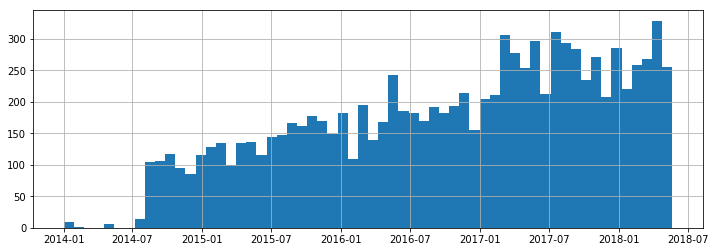

In [19]:
datef.hist(bins=60, figsize=(12, 4))

Interestingly, the amount of data collected seems to be increasin along the time.

There's a data vaccuum in the first half of 2014:

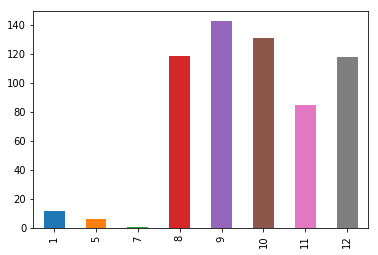

In [24]:
datef[datef.dt.year == 2014].dt.month.value_counts().sort_index().plot(kind='bar')

I don't know if this is an artifact of the data, but, it may be better left to CPE process. I won't drop dates just because I'm not sure of what happened.

# Location

In [26]:
df[[c for c in df if c.startswith('LOCATION')]].head()

,LOCATION_DISTRICT,LOCATION_DISTRICT.1
0,Northwest District,NW Day Shift
1,Southeast District,NaN
2,North District,NaN
3,Homeland Security Bureau/Tactical,Canine Unit - Late
4,Southwest District,NaN


WTF, LOCATION_DISTRICT.1 doesn't even resemble a location...

In [31]:
cols = pandas.read_csv(path, low_memory=False).loc[0]
cols

INCIDENT_UNIQUE_IDENTIFIER                       id
INCIDENT_DATE                          occurredDate
OFFICER_ASSIGNMENT                         division
LOCATION_DISTRICT                          district
SHIFT                                         shift
LOCATION_DISTRICT.1                            beat
REASON_FOR_FORCE                   useOfForceReason
TYPE_OF_FORCE_USED                 officerForceType
SUBJECT_DETAILS                         disposition
INCIDENT_REASON                         serviceType
SUBJECT_WAS_ARRESTED                     arrestMade
CHARGE                                arrestCharges
SUBJECT_INJURY                      residentInjured
SUBJECT_HOSPITALIZATION        residentHospitalized
SUBJECT_DETAILS.1                 residentCondition
OFFICER_INJURY                       officerInjured
OFFICER_HOSPITALIZATION         officerHospitalized
OFFICER_DETAILS                    officerCondition
SUBJECT_RACT                           residentRace
SUBJECT_GEND

OFFICER_ASSIGNMENT looks also wrongly assigned. It's actually referring to the police division. But, this doesn't add further information (I guess), since the LOCATION_DISTRICT already carries in itself the LOCATION_DIVISION information.

In [35]:
location = df[['OFFICER_ASSIGNMENT', 'LOCATION_DISTRICT']]
location.columns = ['division', 'district']
location.head()

,division,district
0,Operations Division,Northwest District
1,Operations Division,Southeast District
2,Operations Division,North District
3,Homeland Security Division,Homeland Security Bureau/Tactical
4,Operations Division,Southwest District


Let's look at the boundaries to see if any geocoding is viable (I guess not).

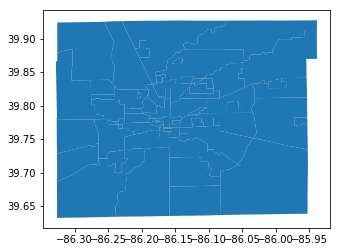

In [36]:
dept.load_police_precincts().plot()

Yep, regions are big,geocoding to a point is counter productive.

The work with this deparmtment is done. The only possible further action is summarizing incidents by district, and I don't wanna do this right now.

Let's just see if the districts in one set really mean police districts or are just town districts. And how we could possibly join the data later.

In [41]:
precincts = dept.load_police_precincts()
precincts = precincts.loc[:, :'POLICEZONE']
precincts.tail()

,OBJECTID,JURISDCTN,DISTRICT,POLICEZONE
55,28,IMPD,North,ND50
56,29,Beech Grove,Excluded,Excluded
57,30,Airport Authority,Excluded,Excluded
58,57,IMPD,Southeast,SE10
59,58,IMPD,Southwest,SW10


In [43]:
location.head()

,division,district
0,Operations Division,Northwest District
1,Operations Division,Southeast District
2,Operations Division,North District
3,Homeland Security Division,Homeland Security Bureau/Tactical
4,Operations Division,Southwest District


In [48]:
location['division'].value_counts()

Operations Division                8569
Administration Division             702
Homeland Security Division          571
Criminal Investigation Division     162
Reserves                             34
Other Assignments                    19
Office of the Chief                   4
Name: division, dtype: int64

In [47]:
location['district'].value_counts()

East District                        2120
Southwest District                   1689
Northwest District                   1376
North District                       1290
Southeast District                   1255
Downtown  District                    798
Training Bureau                       698
Homeland Security Bureau/Tactical     547
Covert Investigations                  71
Narcotics & Gangs                      23
Homicide and Robbery                   23
Park Rangers                           21
Temporary Assignments                  19
Homeland Security Bureau/Traffic       19
Organized Crime                        18
Platoon 4                              13
Operations Support                     12
Investigative Support                  11
Narcotics and Firearms Bureau           9
Cycles                                  8
Platoon 1                               6
Community Engagement Office             5
Intel Operations Branch                 5
Patrol G300                       

I really don't know what these mean (if they are, for example, just administrative branches or if there's a selected zone for each). It seems like a mix, and the districts information are present at the police_districts dataset.

In [51]:
precincts.tail()

,OBJECTID,JURISDCTN,DISTRICT,POLICEZONE
55,28,IMPD,North,ND50
56,29,Beech Grove,Excluded,Excluded
57,30,Airport Authority,Excluded,Excluded
58,57,IMPD,Southeast,SE10
59,58,IMPD,Southwest,SW10


In [53]:
precincts['DISTRICT'].value_counts()

North        11
Northeast    11
Northwest    10
Southwest     8
Excluded      8
Downtown      6
Southeast     6
Name: DISTRICT, dtype: int64

In [55]:
precincts['POLICEZONE'].value_counts().head()

Excluded    8
ND25        1
SW20        1
NE75        1
SE20        1
Name: POLICEZONE, dtype: int64

We may later assemble things with the OFFICER_ID or external data.

For now, let's put this department on hold, as more background information is needed.